#Infosys Price Prediction Using Linear Regression

Collecting Infosys stock data using Twelvedata API key

In [ ]:
import requests

In [ ]:
api_key= 'c62690a9cb76412088a2427a2394b72f'

In [ ]:
#ticker = 'INFY'
#interval = '1day'

api_url = 'https://api.twelvedata.com/sub?symbol=INFY&interval=1day&format=CSV&apikey=demo'

Importing required Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt 

Loading Data

In [ ]:
data = pd.read_csv("data.csv")

data.head()

,datetime,open,high,low,close,volume
0,2021-10-14,1744.00000,1784.05005,1698.25000,1715.50000,495333
1,2021-10-13,1692.00000,1713.50000,1681.30005,1708.69995,130135
2,2021-10-12,1684.00000,1689.00000,1662.00000,1684.80005,313692
3,2021-10-11,1678.15002,1730.30005,1663.94995,1692.00000,240721
4,2021-10-08,1704.00000,1731.00000,1698.19995,1723.55005,343733


In [ ]:
data['datetime'] = pd.to_datetime(data.datetime)

In [ ]:
data.shape

(200, 6)

In [ ]:
data.head()

,datetime,open,high,low,close,volume
0,2021-10-14,1744.00000,1784.05005,1698.25000,1715.50000,495333
1,2021-10-13,1692.00000,1713.50000,1681.30005,1708.69995,130135
2,2021-10-12,1684.00000,1689.00000,1662.00000,1684.80005,313692
3,2021-10-11,1678.15002,1730.30005,1663.94995,1692.00000,240721
4,2021-10-08,1704.00000,1731.00000,1698.19995,1723.55005,343733


In [ ]:
data.isnull().sum()

datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  200 non-null    datetime64[ns]
 1   open      200 non-null    float64       
 2   high      200 non-null    float64       
 3   low       200 non-null    float64       
 4   close     200 non-null    float64       
 5   volume    200 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 9.5 KB


In [ ]:
data.describe()

,open,high,low,close,volume
count,200.000000,200.000000,200.000000,200.000000,2.000000e+02
mean,1468.507747,1482.389749,1454.164252,1468.158997,4.641078e+05
std,162.687389,163.847530,162.891250,163.679149,5.947030e+05
min,1237.000000,1248.000000,1226.099980,1236.349980,5.555100e+04
25%,1337.012485,1349.474975,1320.187473,1336.300050,1.576532e+05
50%,1393.275025,1405.625000,1381.025020,1395.500000,2.667030e+05
75%,1643.500000,1659.212462,1637.137510,1649.450010,4.642162e+05
max,1770.849980,1787.500000,1752.199950,1763.449950,4.505456e+06


In [ ]:
print(len(data))

200


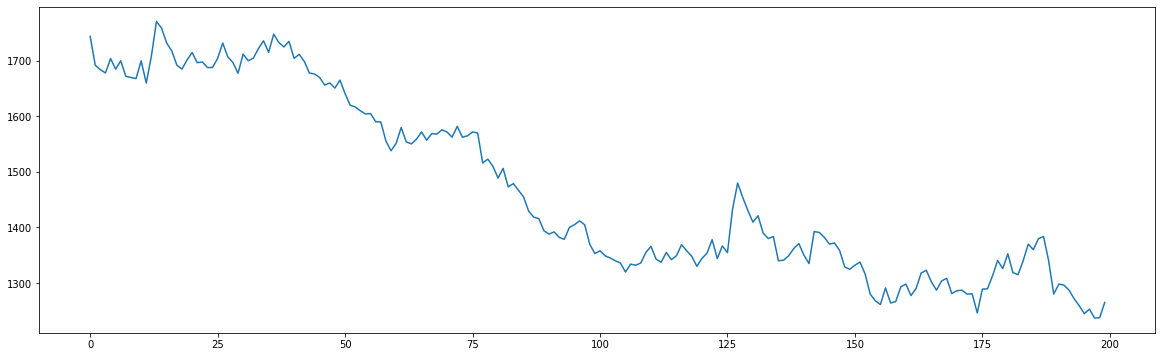

In [ ]:
data['open'].plot(figsize=(20,6))

Separate the Input and Output Columns

In [ ]:

x = data[['open', 'high', 'low', 'volume']]
y = data['close']

Spliting the Train and Test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8, random_state = 100)

In [ ]:
x_train.shape

(160, 4)

In [ ]:
x_test.shape

(40, 4)

####Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
LR = LinearRegression()

Fitting the data in the Model

In [ ]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(LR.coef_)

[-4.99417512e-01  7.21993673e-01  7.76344848e-01  1.87507276e-06]


In [ ]:
print(LR.intercept_)

1.5411092428710162


Prediction

In [ ]:
predicted = LR.predict(x_test)
print(predicted)

[1391.50915178 1338.12399213 1364.33909798 1390.80105858 1354.30002035
 1289.27102475 1356.0970951  1402.17194978 1613.23217696 1569.25783952
 1314.9754649  1357.13180651 1325.53775141 1274.00491074 1339.19249557
 1242.93284592 1261.11231613 1302.62588072 1295.17441589 1700.97872506
 1688.66247839 1583.17463762 1739.64474624 1701.18150966 1404.84162005
 1436.2289593  1381.40081737 1494.30761914 1371.41907962 1362.04180625
 1478.19700001 1550.19561468 1350.92284341 1283.07252937 1269.66666109
 1551.34600224 1703.67842947 1278.47140901 1265.54250853 1470.84544194]


In [ ]:
predicted.shape

(40,)

In [ ]:
dfr=pd.DataFrame(y_test,predicted)

In [ ]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})

In [ ]:
print(dfr)

     Actual Price  Predicted Price
126    1398.59998      1391.509152
104    1339.94995      1338.123992
99     1361.90002      1364.339098
92     1389.50000      1390.801059
111    1361.15002      1354.300020
167    1296.09998      1289.271025
116    1355.55005      1356.097095
96     1404.80005      1402.171950
52     1610.25000      1613.232177
69     1562.50000      1569.257840
164    1309.69995      1314.975465
124    1352.55005      1357.131807
182    1317.05005      1325.537751
154    1268.69995      1274.004911
125    1361.50000      1339.192496
196    1246.19995      1242.932846
194    1260.40002      1261.112316
177    1301.75000      1302.625881
163    1290.09998      1295.174416
31     1704.15002      1700.978725
11     1689.90002      1688.662478
73     1581.25000      1583.174638
15     1741.69995      1739.644746
41     1704.75000      1701.181510
97     1404.65002      1404.841620
128    1440.75000      1436.228959
133    1385.30005      1381.400817
82     1497.05005   

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
LR.score(x_test,y_test)

0.9979601789721826

In [ ]:
graph=dfr.head(20)

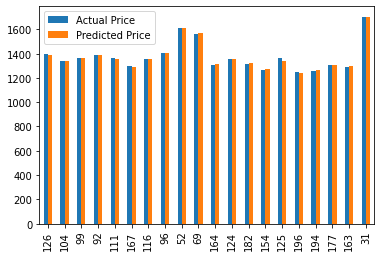

In [ ]:
graph.plot(kind='bar')

In [ ]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 4.568655078091183
Mean Squared Error: 41.98154859118825
Root Mean Squared Error: 6.479316984928909
